In [87]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_rows', 50)


In [88]:
climate = pd.read_csv('../data/raw/climate_risk_index.csv')

In [89]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
Rank                                     183 non-null    int64  
 1   Country                                      183 non-null    object 
score                                    183 non-null    float64
(Rank)                    183 non-null    int64  
itants (Rank)  183 non-null    int64  
(Rank)         183 non-null    int64  
% (Rank)             183 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 10.1+ KB


In [90]:
climate.describe()

,CRI\rRank,CRI\rscore,Fatalities\rin 2018\r(Rank),Fatalities per\r100 000 inhab-\ritants (Rank),Losses in mil-\rlion US$ (PPP)\r(Rank),Losses per\runit GDP in\r% (Rank)
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,85.508197,82.204918,78.147541,79.180328,85.573770,85.573770
std,44.744190,35.372951,37.862317,38.198948,44.719809,44.719809
min,1.000000,5.500000,1.000000,1.000000,1.000000,1.000000
25%,46.500000,53.250000,46.500000,46.500000,46.500000,46.500000
50%,92.000000,83.330000,88.000000,92.000000,92.000000,92.000000
75%,135.000000,125.000000,115.000000,115.000000,135.000000,135.000000
max,135.000000,125.000000,115.000000,115.000000,135.000000,135.000000


In [91]:
# Renaming columns


climate.columns.str.strip()
climate.columns = climate.columns.str.replace(' ','_')
climate.columns = climate.columns.str.replace('%','pct')
climate.columns = climate.columns.str.replace('\r','_')
climate.columns = climate.columns.str.replace('(','')
climate.columns = climate.columns.str.replace(')','')

climate.columns = climate.columns.str.lower()

climate.head()



,cri_rank,country,cri_score,fatalities_in_2018_rank,fatalities_per_100_000_inhab-_itants_rank,losses_in_mil-_lion_us$_ppp_rank,losses_per_unit__gdp_in_pct_rank
0,125,Albania,108.00,102,87,124,124
1,109,Algeria,93.83,47,76,110,127
2,80,Angola,76.00,52,72,82,89
3,135,Antigua and Barbuda,125.00,115,115,135,135
4,40,Argentina,48.33,61,101,5,11


In [92]:
climate.head()

,cri_rank,country,cri_score,fatalities_in_2018_rank,fatalities_per_100_000_inhab-_itants_rank,losses_in_mil-_lion_us$_ppp_rank,losses_per_unit__gdp_in_pct_rank
0,125,Albania,108.00,102,87,124,124
1,109,Algeria,93.83,47,76,110,127
2,80,Angola,76.00,52,72,82,89
3,135,Antigua and Barbuda,125.00,115,115,135,135
4,40,Argentina,48.33,61,101,5,11


In [93]:

#columns_to_delete=['fatalities_in_2018_rank','fatalities_per_100_000_inhab-_itants_rank','losses_in_mil-_lion_us$_ppp_rank','losses_per_unit__gdp_in_pct_rank']

#for col in columns_to_delete:
#    climate.drop(col, axis=1, inplace=True)

#climate.head()

In [94]:

# sort by those highest at risk first

climate.sort_values('cri_score', ascending=False)

,cri_rank,country,cri_score,fatalities_in_2018_rank,fatalities_per_100_000_inhab-_itants_rank,losses_in_mil-_lion_us$_ppp_rank,losses_per_unit__gdp_in_pct_rank
143,135,Seychelles,125.00,115,115,135,135
144,135,Sierra Leone,125.00,115,115,135,135
64,135,Guinea,125.00,115,115,135,135
30,135,Chad,125.00,115,115,135,135
134,135,Republic of Congo,125.00,115,115,135,135
...,...,...,...,...,...,...,...
71,5,India,18.17,1,34,2,19
97,4,Madagascar,15.83,17,20,30,4
59,3,Germany,13.83,3,1,6,36
129,2,Philippines,11.17,4,14,7,14


In [119]:
climate[climate['country'] == 'United States']

,cri_rank,country,cri_score,fatalities_in_2018_rank,fatalities_per_100_000_inhab-_itants_rank,losses_in_mil-_lion_us$_ppp_rank,losses_per_unit__gdp_in_pct_rank
175,12,United States,23.83,6,50,1,18


# World Map geopandas

<Axes: >

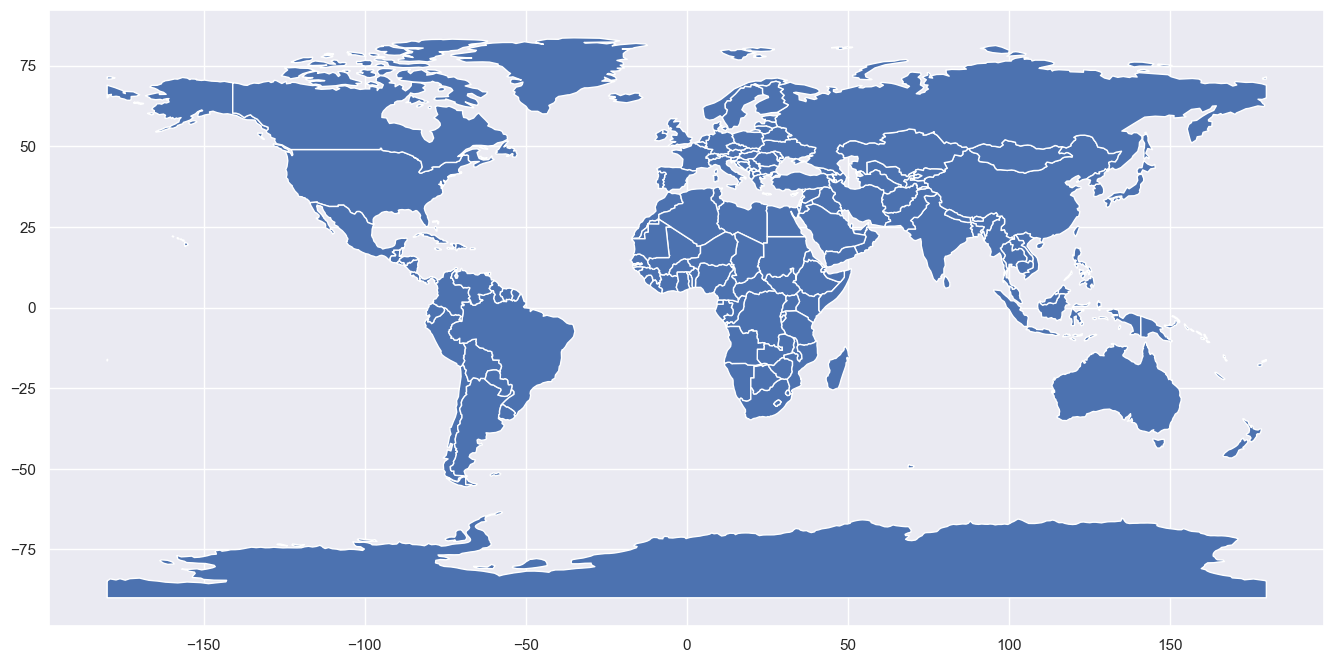

In [96]:
world_map = gpd.read_file('../data/raw/world_map_lo_res.geo.json')
world_map.head()
world_map.rename(columns={'sovereignt':'country'}, inplace=True)

world_map.plot()

In [123]:
world_map.loc[world_map['country'].str.contains('United States of America', case=False), 'country'] = 'United States'


## Top 50 countries by CRI rank


In [124]:
num_countries = 50
high_risk_countries = climate.sort_values('cri_rank', ascending=False)[:num_countries-1]['country']

['Seychelles', 'Sierra Leone', 'Guinea', 'Chad', 'Republic of Congo', 'Qatar', 'Papua New Guinea', 'Comoros', 'North Macedonia', 'Morocco', 'Moldova', 'Micronesia', 'Marshall Islands', 'Democratic Republic of Ti-\rmor-Leste', 'Malta', 'Mali', 'Dominica', 'Libya', 'Liberia', 'Eritrea', 'Kosovo', 'Kiribati', 'Iceland', 'Finland', 'Guyana', 'Cape Verde', 'Gabon', 'Singapore', 'The Bahamas', 'Zambia', 'Antigua and Barbuda', 'Uzbekistan', 'Armenia', 'United Arab Emirates', 'Tuvalu', 'Azerbaijan', 'Bahrain', 'Togo', 'Barbados', 'Belize', 'The Gambia', 'Bhutan', 'St. Vincent and the Grena-\rdines', 'St. Kitts and Nevis', 'Burkina Faso', 'Suriname', 'St. Lucia', 'Botswana', 'Brunei Darussalam']


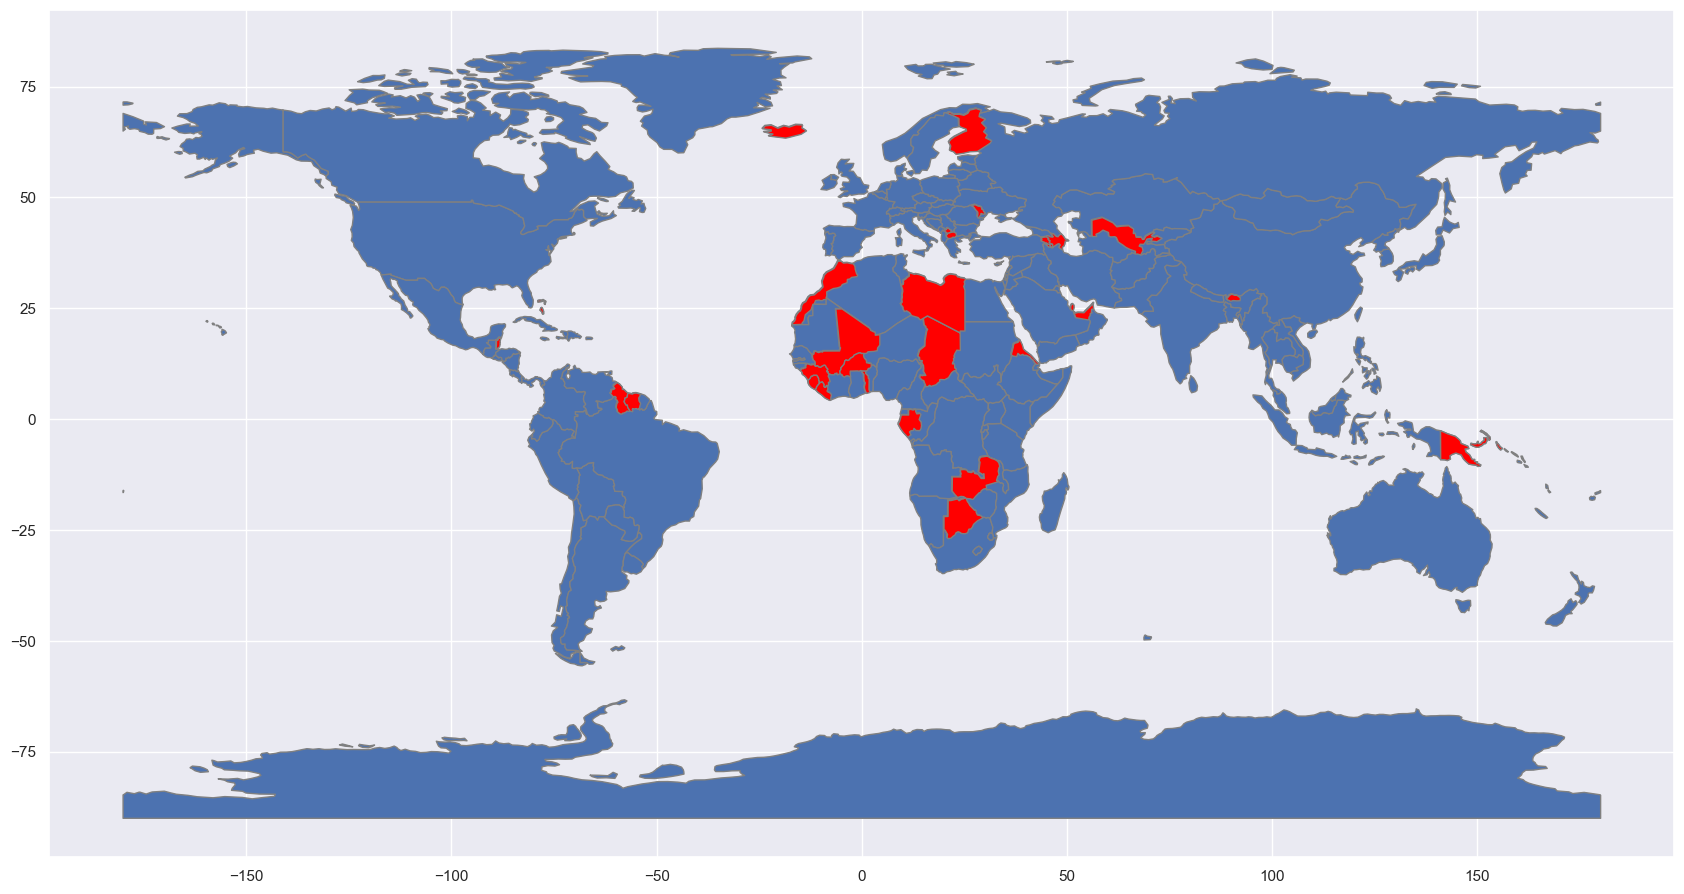

In [126]:

def plotCountries(countries, axis, col):
    for country in countries:
        try:
            world_map[world_map.country == country].plot(edgecolor=u'gray', color=col, ax=axis)
        except Exception:
            pass


ax2 =  world_map.plot(edgecolor=u'gray', aspect=1 )
countries_list = high_risk_countries.to_list()
print(countries_list)
plotCountries(countries_list[1:], ax2, 'red')

# Global map of countries by Climate Risk  (CRI score)

/var/folders/mg/cxqpxyl558j0s1whyjztzdr00000gn/T/ipykernel_58940/1212907327.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')


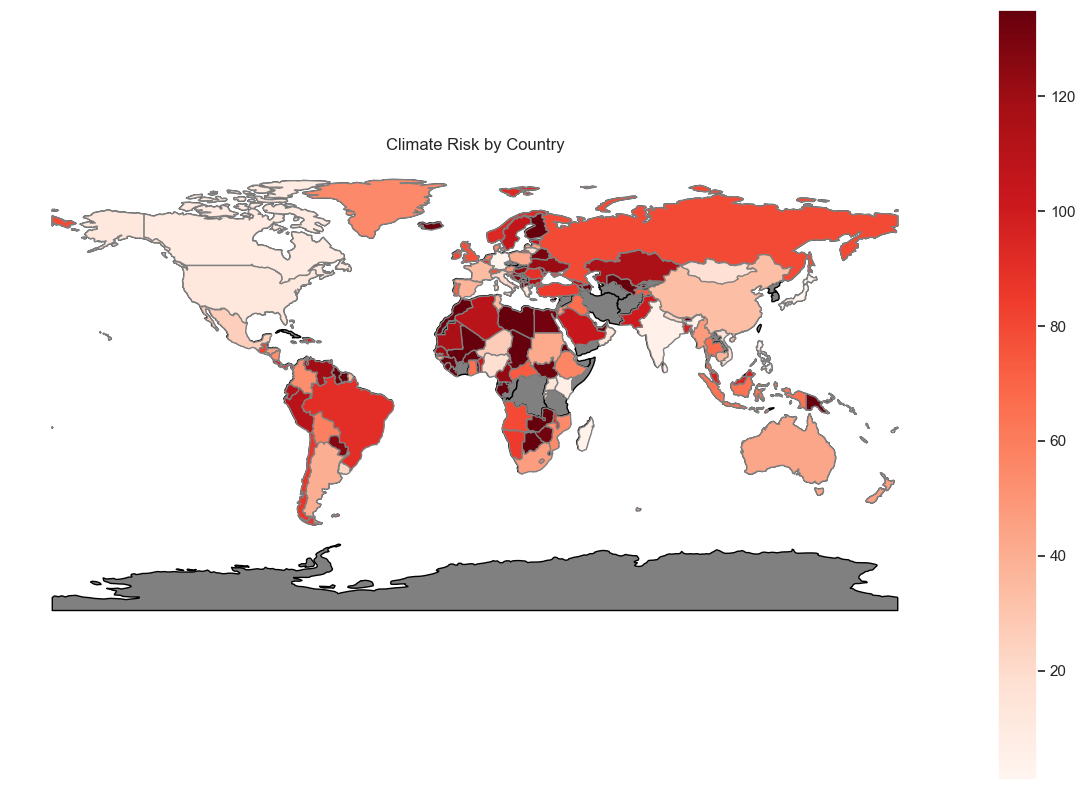

In [133]:


fig, ax3 = plt.subplots(1,1,figsize=(15,10))
world_map.plot(edgecolor=u'black', aspect=1, ax=ax3, color=u'grey')
ax3.set_title("Climate Risk by Country")
ax3.set_axis_off()
ax3.grid(False)

# Create a colormap for the 'cri_rank'
cmap = plt.cm.get_cmap('Reds')

# Normalize the 'cri_rank' values to fit the colormap range
normalize = plt.Normalize(vmin=climate['cri_rank'].min(), vmax=climate['cri_rank'].max())

for index, row in climate.iterrows():

    country_color = cmap(normalize(row['cri_rank']))
    plotCountries([row['country']], ax3, country_color)

# Create mappable on the side
sm = plt.cm.ScalarMappable(cmap="Reds", norm=normalize)
ax3.figure.colorbar(sm, ax=ax3)



[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Climate Risk Index (Score)'),
 Text(0.5, 1.0, 'Climate Risk Index by Country')]

) missing from current font.a3/envs/emoji/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.a3/envs/emoji/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


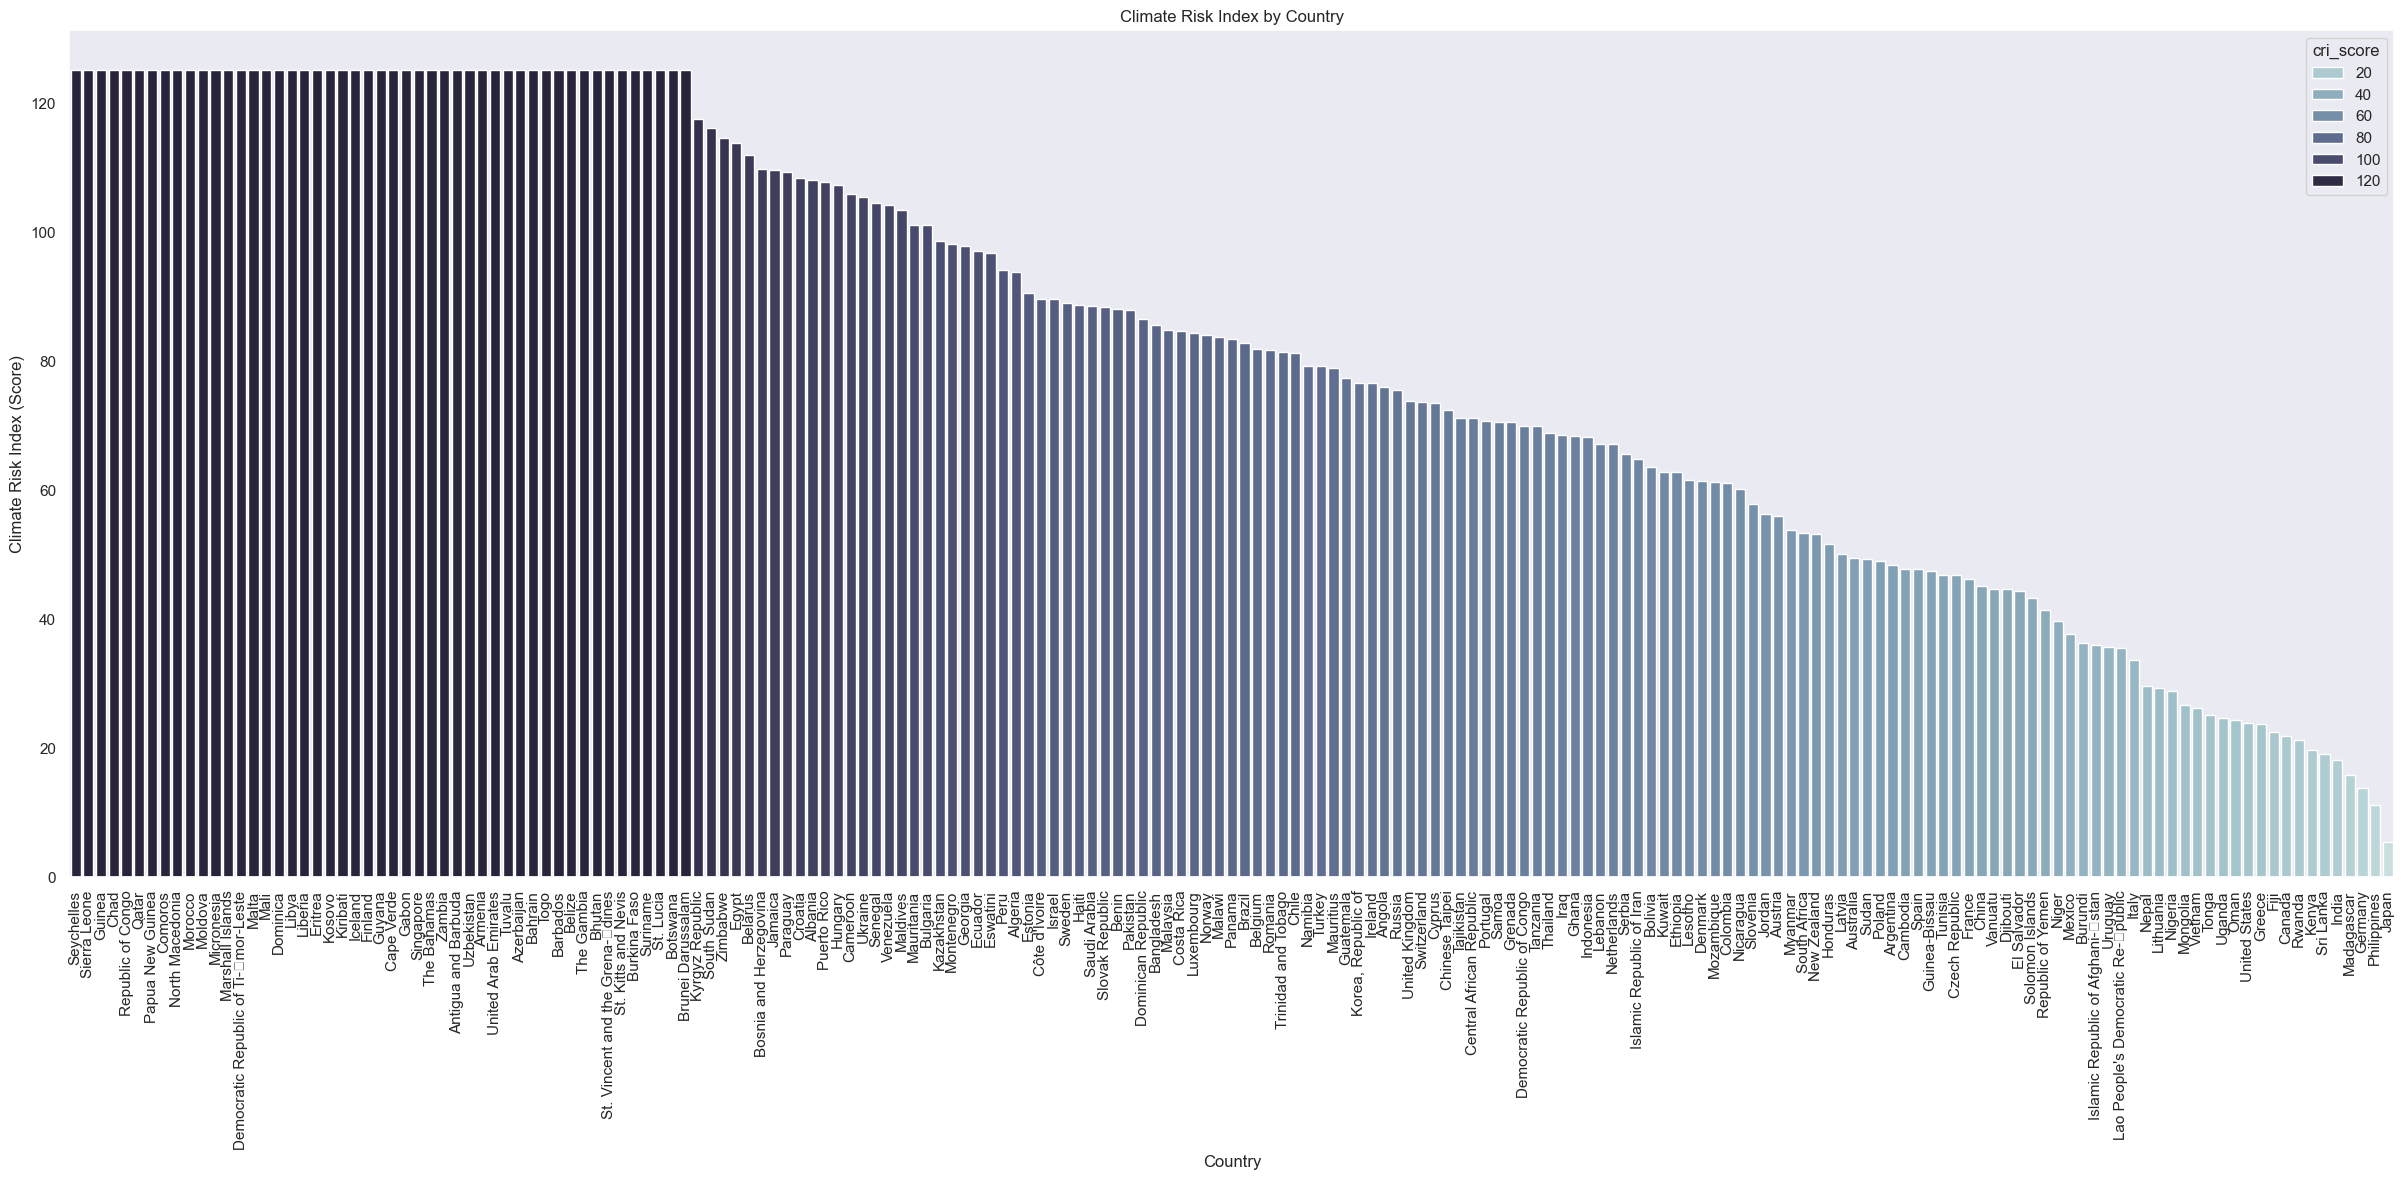

In [116]:
# Set Seaborne color palette
palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

sns.set(rc={'figure.figsize':(30,11)})

climate_sorted = climate.sort_values('cri_score', ascending=False)

#Hide the legend 
plt.legend([],[], frameon=False)

ax = sns.barplot(data=climate_sorted,y='cri_score', x='country', palette=palette, hue = climate_sorted['cri_score'])

ax.tick_params(axis='x', rotation=90)
ax.grid(False)
ax.set(xlabel='Country', ylabel='Climate Risk Index (Score)', title='Climate Risk Index by Country')

#norm = plt.Normalize(climate_sorted['cri_score'].min(), climate_sorted['cri_score'].max())
#sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
#ax.figure.colorbar(sm, ax=ax)


In [101]:
happiness = pd.read_csv('../data/raw/WHR2023Table.csv')
#merged_happiness = happiness.merge(inequality_df[['countryname', 'year', 'inequality']], how='inner', left_on=['Country name', 'year'], right_on=['countryname', 'year']).drop(columns='countryname')

happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [102]:
climate.head()

,cri_rank,country,cri_score,fatalities_in_2018_rank,fatalities_per_100_000_inhab-_itants_rank,losses_in_mil-_lion_us$_ppp_rank,losses_per_unit__gdp_in_pct_rank
0,125,Albania,108.00,102,87,124,124
1,109,Algeria,93.83,47,76,110,127
2,80,Angola,76.00,52,72,82,89
3,135,Antigua and Barbuda,125.00,115,115,135,135
4,40,Argentina,48.33,61,101,5,11


In [103]:
happiness_2021 = happiness[happiness.year == 2021]

happiness_2021.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
12,Afghanistan,2021,2.436,7.324,0.454,54.55,0.394,-0.081,0.946,0.179,0.607
27,Albania,2021,5.255,9.583,0.702,69.15,0.827,0.041,0.896,0.554,0.254
38,Algeria,2021,5.217,9.309,0.841,66.60,0.558,-0.113,0.712,0.498,0.258
58,Argentina,2021,5.908,9.977,0.882,67.20,0.819,-0.012,0.816,0.685,0.345
74,Armenia,2021,5.301,9.561,0.762,67.65,0.795,-0.156,0.705,0.566,0.478


In [104]:
print("Unique countries in climate  df", len(climate['country'].unique()))
print("Unique countries in happiness df", len(happiness_2021['Country name'].unique()))

Unique countries in climate  df 183
Unique countries in happiness df 122


In [105]:
print(climate['country'][~climate['country'].isin(happiness_2021['Country name'])])


2                   Angola
3      Antigua and Barbuda
8               Azerbaijan
9                  Bahrain
11                Barbados
              ...         
166                  Tonga
167    Trinidad and Tobago
169                 Turkey
170                 Tuvalu
178                Vanuatu
Name: country, Length: 73, dtype: object


In [106]:
#climate[climate['country'].str.contains("Ang")]
#happiness_2021[happiness_2021['Country name'].str.contains("Ang")]

#climate[climate['country'].str.contains("Uni")]
#happiness_2021[happiness_2021['Country name'].str.contains("Uni")]




In [107]:
uncommon_list = climate['country'][~climate['country'].isin(happiness_2021['Country name'])]


merged_happiness = pd.merge(climate, happiness_2021, left_on='country', right_on='Country name')

## Correlation between CRI score and Life Ladder score

In [108]:
merged_happiness = merged_happiness.sort_values('Life Ladder')

merged_happiness.corr(numeric_only=True)

,cri_rank,cri_score,fatalities_in_2018_rank,fatalities_per_100_000_inhab-_itants_rank,losses_in_mil-_lion_us$_ppp_rank,losses_per_unit__gdp_in_pct_rank,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
cri_rank,1.000000,0.992594,0.771434,0.801387,0.864047,0.876546,NaN,-0.072703,-0.104655,-0.158191,-0.143474,-0.014482,-0.039080,0.056347,-0.149262,0.034702
cri_score,0.992594,1.000000,0.783395,0.807651,0.870708,0.879927,NaN,-0.079440,-0.119251,-0.168730,-0.157486,-0.017824,-0.020269,0.054582,-0.152496,0.060852
fatalities_in_2018_rank,0.771434,0.783395,1.000000,0.771975,0.594230,0.443900,NaN,0.157262,0.085035,0.105264,0.022091,0.083270,-0.083099,-0.099836,-0.005792,-0.150172
fatalities_per_100_000_inhab-_itants_rank,0.801387,0.807651,0.771975,1.000000,0.442959,0.492326,NaN,0.092444,0.022055,0.019934,-0.065605,0.126663,0.081359,-0.108494,0.001983,-0.092197
losses_in_mil-_lion_us$_ppp_rank,0.864047,0.870708,0.594230,0.442959,1.000000,0.897165,NaN,-0.255025,-0.301947,-0.328143,-0.281494,-0.128139,-0.113828,0.202198,-0.248408,0.184950
losses_per_unit__gdp_in_pct_rank,0.876546,0.879927,0.443900,0.492326,0.897165,1.000000,NaN,-0.202496,-0.179905,-0.291301,-0.178719,-0.118939,-0.018660,0.161446,-0.229781,0.192132
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life Ladder,-0.072703,-0.079440,0.157262,0.092444,-0.255025,-0.202496,NaN,1.000000,0.809004,0.818279,0.730617,0.573450,0.151195,-0.478347,0.555383,-0.593082
Log GDP per capita,-0.104655,-0.119251,0.085035,0.022055,-0.301947,-0.179905,NaN,0.809004,1.000000,0.756275,0.867435,0.398782,0.018407,-0.427912,0.305526,-0.517455
Social support,-0.158191,-0.168730,0.105264,0.019934,-0.328143,-0.291301,NaN,0.818279,0.756275,1.000000,0.682594,0.405258,0.124635,-0.286425,0.514110,-0.657597


Looks like the correlation is low : 0.079% only


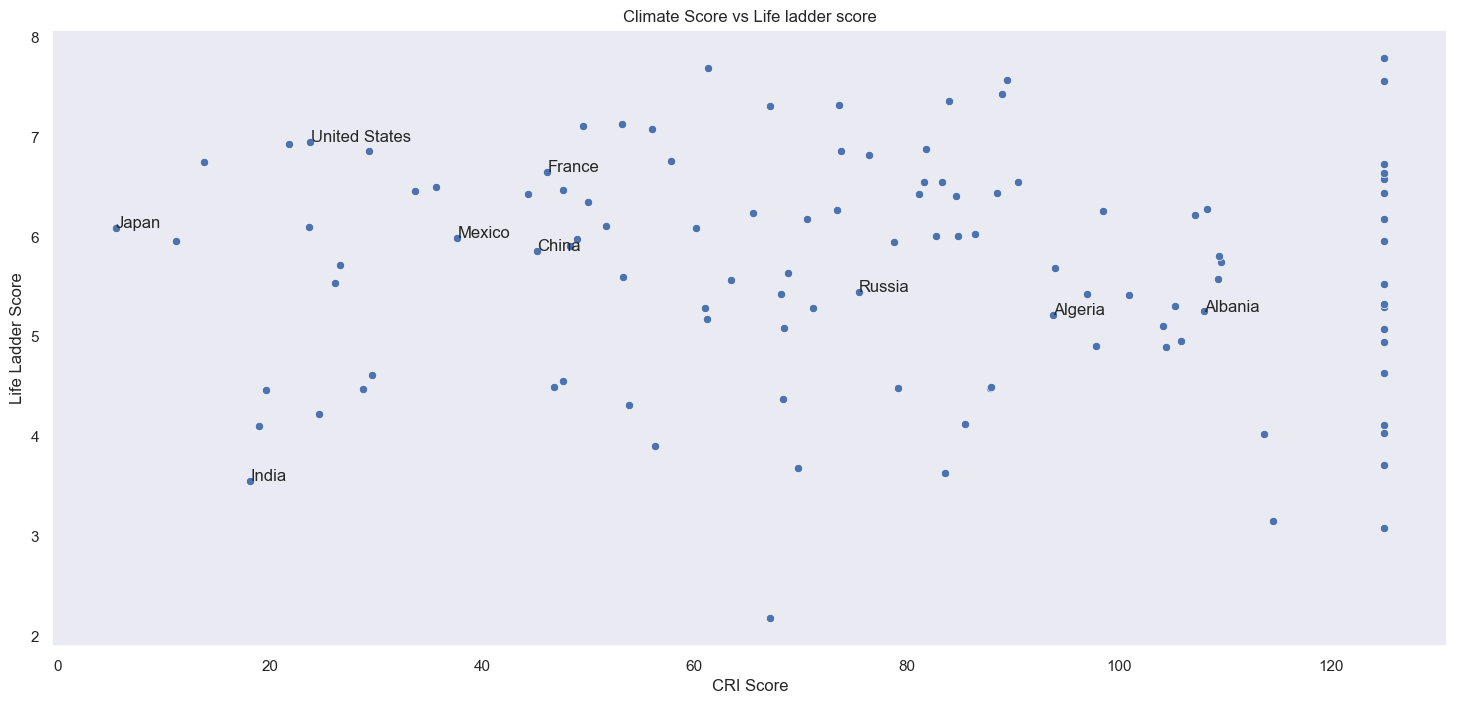

In [112]:
sns.set(rc={'figure.figsize':(18,8)})
ax = sns.scatterplot(merged_happiness, x='cri_score', y='Life Ladder')
ax.grid(False)

ax.set_title("Climate Score vs Life ladder score")
ax.set_xlabel("CRI Score")
ax.set_ylabel("Life Ladder Score")
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] in ['United States', 'China', 'Russia', 'India', 'Mexico', 'Japan', 'France','Albania','Algeria']:
            ax.text(point['x']+.02, point['y'], str(point['val']))
label_point(merged_happiness['cri_score'], merged_happiness['Life Ladder'], merged_happiness['Country name'], ax)

There seems to be no strong correlation between Climate Risk and Happiness Ladder score. Is this indicative of people living in oblivion?